In [1]:
import numpy as np
from scipy.stats import t
import pandas as pd
import matplotlib.pyplot as plt

## Simulation System 1

This system has patients with different CTAS levels (1 to 5) flowing into different departments (Triage, ED, and Inpatient). Along with this, patients undergo diagnostic tests at the Triage and ED levels. 

The simulation parameters are as follows: \
No. doctors: 100 \
No. nurses: 100 \
No. of admin staff: 70 \
No. of consultants: 50 


The simulation is run for 10080 minutes (i.e. one week) and LOS data from first 500 patients is discarded as warm-up data. In total 11000 LOS data values are selected from each simulation run.

The seeds used for 5 rounds are: \
Round 1: 100 \
Round 2: 121 \
Round 3: 146 \
Round 4: 258 \
Round 5: 35

In [101]:
# Read simulation results as dataframe
df1 = pd.read_csv("../results/simulation_results_system_1_1.csv", sep=r",(?![^\[]*\])")
df2 = pd.read_csv("../results/simulation_results_system_1_2.csv", sep=r",(?![^\[]*\])")
df3 = pd.read_csv("../results/simulation_results_system_1_3.csv", sep=r",(?![^\[]*\])")
df4 = pd.read_csv("../results/simulation_results_system_1_4.csv", sep=r",(?![^\[]*\])")
df5 = pd.read_csv("../results/simulation_results_system_1_5.csv", sep=r",(?![^\[]*\])")
df_list = [df1, df2, df3, df4, df5]

/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_16023/2911554503.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv("../results/simulation_results_system_1_1.csv", sep=r",(?![^\[]*\])")
/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_16023/2911554503.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv("../results/simulation_results_system_1_2.csv", sep=r",(?![^\[]*\])")
/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_16023/2911554503.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex

In [102]:
for df in df_list:
    df.columns = df.columns.str.lstrip()

In [103]:
df1[:5]

,Patient ID,CTAS Level,Tests,Arrival Time,Departure Time,LOS,Triage Waiting Time,ED Waiting Time,Medication Waiting Time,Inpatient Waiting Time,Triage Waiting Room Length,ED Waiting Room Length,Medication Waiting Room Length,Inpatient Waiting Room Length
0,1,1,[],0.000000,10.573837,10.573837,0.0,0.0,0.000000,0.0,1,1,10,1
1,2,3,"['Triage ECG', 'Triage Urine', 'ED Blood Test']",0.365564,91.394581,91.029017,0.0,0.0,1.814476,0.0,1,1,10,1
2,3,0,[],1.462743,0.000000,-1.462743,0.0,0.0,0.000000,0.0,1,1,10,1
3,4,0,[],1.532924,0.000000,-1.532924,0.0,0.0,0.000000,0.0,1,1,10,1
4,5,1,"['ED Blood Test', 'ED CT']",1.899614,79.982181,78.082567,0.0,0.0,0.000000,0.0,1,1,10,1


In [104]:
# Read LOS data from dataframe df
# LOS values of only treated patients is considered
# Treated patients are the ones that complete their run (arrival to departure) in the ER

los_vals_1 = []
los_vals_2 = []
los_vals_3 = []
los_vals_4 = []
los_vals_5 = []

for items in df1["LOS"]:
    if items > 0:
        los_vals_1.append(items/60)

for items in df2["LOS"]:
    if items > 0:
        los_vals_2.append(items/60)
        
for items in df3["LOS"]:
    if items > 0:
        los_vals_3.append(items/60)
        
for items in df4["LOS"]:
    if items > 0:
        los_vals_4.append(items/60)
        
for items in df5["LOS"]:
    if items > 0:
        los_vals_5.append(items/60)

los_vals_list = [los_vals_1, los_vals_2, los_vals_3, los_vals_4, los_vals_5]
print(min(los_vals_1), max(los_vals_1))

0.11295399103407061 4.159892944099905


In [105]:
mean_list = []
std_dev_list = []
n_list = []

for los_vals in los_vals_list:
    los_vals = np.array(los_vals[500:11500])
    mean_list.append(np.mean(los_vals))
    std_dev_list.append(np.std(los_vals))

    n_list.append(len(los_vals))

print(mean_list, std_dev_list, n_list)

[1.3893553477717482, 1.4105869704767848, 1.4662228646778233, 1.4087181498866974, 1.4015799480850004] [0.7335296638260955, 0.7606858339148109, 0.8552760882871893, 0.7400482631720063, 0.7245077874767899] [11000, 11000, 11000, 11000, 11000]


In [106]:
# Check critical values from table/ppf function
alpha = 0.05
t_critical_list = []

for n in n_list:
    dof = n - 1
    t_critical_list.append(t.ppf(1-alpha/2, dof))

print(t_critical_list)

[1.960179688500917, 1.960179688500917, 1.960179688500917, 1.960179688500917, 1.960179688500917]


In [107]:
# Calculate confidence interval
# H_val = t_critical * std_dev * (np.sqrt(1 + (1/n)))

# H_val_list = []
lower_bound = []
upper_bound = []

for index, t_critical in enumerate(t_critical_list):
    H_val = t_critical * std_dev_list[index] * (1/np.sqrt(n_list[index]))
    lower_bound.append(mean_list[index] - H_val)
    upper_bound.append(mean_list[index] + H_val)

print(lower_bound, upper_bound)
# print([mean - lower_bound], [upper_bound - mean])

[1.375645986428607, 1.3963700717199554, 1.4502381137935603, 1.3948869586595158, 1.3880392018217467] [1.4030647091148893, 1.4248038692336142, 1.4822076155620862, 1.422549341113879, 1.4151206943482542]


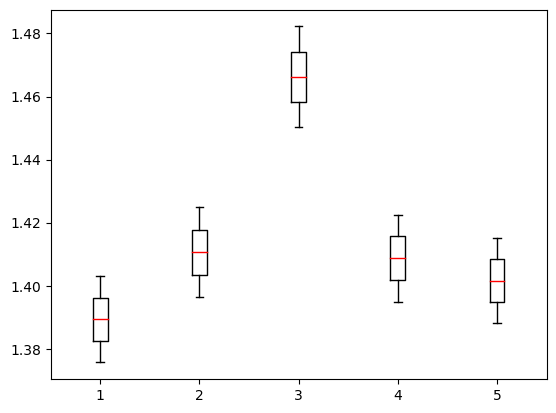

In [115]:
# Plot boxplot for confidence intervals
# fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 8))
interval_list = []
for index, mean in enumerate(mean_list):
    interval_list.append([lower_bound[index], mean, upper_bound[index]])

for index, interval in enumerate(interval_list):
    plt.boxplot(interval, medianprops=dict(color="red"), positions=[index+1])
    # plt.plot((index, index, index), interval)
    # plt.axhline(y=interval[1], color='orange', linestyle='--')
    
plt.show()

In [100]:
# Drawing bar graph with error bars to show confidence interval

# fig, ax = plt.subplots()
# ax.bar(0, los_vals, yerr=[[mean - lower_bound], [upper_bound - mean]], align='center', alpha=0.5, ecolor='black', capsize=10)

# ax.set_ylabel('Mean LOS')
# ax.set_xticks([0])
# ax.set_xticklabels(['Hospital A'])
# ax.set_title('Mean LOS')

# plt.show()